## Project: Behavioral Risk Factors

#### Team Members
Amit Sharma\
Pranav Karmalkar\
Swapnil Parihar

In [69]:
import pandas as pd
import numpy as np
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from matplotlib import pyplot
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
data_2011 = pd.read_csv('2015.csv')

In [72]:
data_2011.describe()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,441456.000000,441456.000000,441456.000000,4.414560e+05,4.414560e+05,254645.0,254645.000000,45.0,254643.0,254646.000000,...,441456.000000,441456.000000,438657.000000,438657.000000,438657.000000,441456.000000,441456.000000,157954.000000,157954.000000,398069.000000
mean,29.968715,6.359676,1115.040457,2.015005e+09,2.015005e+09,1.0,1.000177,1.0,1.0,1.545133,...,3.494124,2.742695,2.716879,2.815149,3.652717,1.824624,1.887028,2.290705,2.412259,1.970156
std,16.034710,3.487131,35.746794,4.113443e+03,4.113443e+03,0.0,0.013292,0.0,0.0,0.497960,...,2.398322,2.449676,1.324145,1.356101,1.266730,2.360812,2.351387,2.518086,2.778032,1.441119
min,1.000000,1.000000,1100.000000,2.015000e+09,2.015000e+09,1.0,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,1100.000000,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,29.000000,6.000000,1100.000000,2.015004e+09,2.015004e+09,1.0,1.000000,1.0,1.0,2.000000,...,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,44.000000,9.000000,1100.000000,2.015007e+09,2.015007e+09,1.0,1.000000,1.0,1.0,2.000000,...,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,72.000000,12.000000,1200.000000,2.015023e+09,2.015023e+09,1.0,2.000000,1.0,1.0,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


The Dataset for 2015 year has 323 columns

In [73]:
# Optional Step required only if target column contains Nan Values
data_2011.dropna(subset=['MENTHLTH'],inplace=True)

In [74]:
# See the names of the columns in the dataframe
L = sorted(data_2011.columns)

for i in L:
    print(i)

ACTIN11_
ACTIN21_
ADANXEV
ADDEPEV2
ADDOWN
ADEAT1
ADENERGY
ADFAIL
ADMOVE
ADPLEASR
ADSLEEP
ADTHINK
ALCDAY5
ARTHDIS2
ARTHEDU
ARTHEXER
ARTHSOCL
ARTHWGT
ARTTODAY
ASACTLIM
ASATTACK
ASDRVIST
ASERVIST
ASINHALR
ASNOSLEP
ASPUNSAF
ASRCHKUP
ASTHMA3
ASTHMAGE
ASTHMED3
ASTHNOW
ASYMPTOM
AVEDRNK2
BEANDAY_
BLDSTOOL
BLDSUGAR
BLIND
BLOODCHO
BPHIGH4
BPMEDS
CADULT
CAREGIV1
CASTHDX2
CASTHNO2
CCLGHOUS
CDASSIST
CDDISCUS
CDHELP
CDHOUSE
CDSOCIAL
CELLFON2
CELLFON3
CHCCOPD1
CHCKIDNY
CHCOCNCR
CHCSCNCR
CHECKUP1
CHILDREN
CHKHEMO3
CHOLCHK
CIMEMLOS
COLGHOUS
CPDEMO1
CRGVEXPT
CRGVHOUS
CRGVHRS1
CRGVLNG1
CRGVMST2
CRGVPERS
CRGVPRB1
CRGVREL1
CSTATE
CTELENUM
CTELNUM1
CVDASPRN
CVDCRHD4
CVDINFR4
CVDSTRK3
DECIDE
DIABAGE2
DIABEDU
DIABETE3
DIABEYE
DIFFALON
DIFFDRES
DIFFWALK
DISPCODE
DOCTDIAB
DRADVISE
DRNK3GE5
DRNKANY5
DROCDY3_
EDUCA
EMPLOY1
EMTSUPRT
EXACTOT1
EXACTOT2
EXERANY2
EXERHMM1
EXERHMM2
EXEROFT1
EXEROFT2
EXRACT11
EXRACT21
EYEEXAM
FC60_
FEETCHK
FEETCHK2
FLSHTMY2
FLUSHOT6
FMONTH
FRUIT1
FRUITJU1
FRUTDA1_
FTJUDA1_
FVBEANS
FVGRE

In [75]:
# Target Column variations available
data_2011['MENTHLTH'].value_counts()

88.0    301076
30.0     22184
2.0      21229
5.0      14749
1.0      13658
3.0      12253
10.0     10684
15.0      9795
4.0       6259
20.0      5944
7.0       5667
77.0      5204
14.0      2229
99.0      2204
25.0      2081
6.0       1730
8.0       1140
12.0       706
28.0       591
21.0       404
29.0       333
9.0        203
18.0       178
16.0       174
27.0       154
22.0       116
17.0       101
13.0        93
26.0        76
11.0        73
23.0        70
24.0        67
19.0        31
Name: MENTHLTH, dtype: int64

### Dropping Derived Columns

In [76]:
# To identify and remove all derived columns that dilute the feature importance of original feature

L = []
for i in data_2011.columns:
    if i.startswith('_'):
        L.append(i)
data_2011.drop(L, axis=1, inplace = True)

In [77]:
test_set = data_2011.loc[data_2011.MENTHLTH.isin([77,99])]

In [78]:
test_set.head()

,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,CTELENUM,PVTRESD1,COLGHOUS,...,PAFREQ1_,PAFREQ2_,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_
24,1.0,b'01032015',b'01',b'03',b'2015',1100.0,2.015000e+09,1.0,1.0,NaN,...,2000.0,NaN,5.397605e-79,5.397605e-79,60.0,5.397605e-79,60.0,5.397605e-79,5.397605e-79,5.397605e-79
40,1.0,b'01152015',b'01',b'15',b'2015',1100.0,2.015000e+09,1.0,1.0,NaN,...,3000.0,NaN,5.397605e-79,5.397605e-79,180.0,5.397605e-79,180.0,9.000000e+01,5.397605e-79,9.000000e+01
55,2.0,b'02142015',b'02',b'14',b'2015',1100.0,2.015000e+09,1.0,1.0,NaN,...,NaN,NaN,5.397605e-79,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
93,3.0,b'03182015',b'03',b'18',b'2015',1100.0,2.015000e+09,1.0,1.0,NaN,...,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN
130,1.0,b'01092015',b'01',b'09',b'2015',1100.0,2.015000e+09,1.0,1.0,NaN,...,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN


Only 254 non-derived columns present. 69 columns were derived 

### Dropping Columns that do not have categorical values

In [79]:
# Remove columns of the type date

test_set = test_set.select_dtypes(exclude=['object'])

In [80]:
test_set.head()

,FMONTH,DISPCODE,SEQNO,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,...,PAFREQ1_,PAFREQ2_,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_
24,1.0,1100.0,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,...,2000.0,NaN,5.397605e-79,5.397605e-79,60.0,5.397605e-79,60.0,5.397605e-79,5.397605e-79,5.397605e-79
40,1.0,1100.0,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,1.0,...,3000.0,NaN,5.397605e-79,5.397605e-79,180.0,5.397605e-79,180.0,9.000000e+01,5.397605e-79,9.000000e+01
55,2.0,1100.0,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,1.0,...,NaN,NaN,5.397605e-79,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
93,3.0,1100.0,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,...,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN
130,1.0,1100.0,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,...,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN


 8 non-categoical columns removed

### Dropping columns with zero standard variation in the test set

In [81]:
# Removes all the columns with zero standard variation in the test set

test_set.drop(test_set.std()[(test_set.std() == 0)].index, axis=1,inplace = True)
test_set.head()

,FMONTH,DISPCODE,SEQNO,PVTRESD1,COLGHOUS,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,...,PAFREQ1_,PAFREQ2_,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_
24,1.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,2.0,1.000000e+00,1.000000e+00,...,2000.0,NaN,5.397605e-79,5.397605e-79,60.0,5.397605e-79,60.0,5.397605e-79,5.397605e-79,5.397605e-79
40,1.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,1.0,1.000000e+00,5.397605e-79,...,3000.0,NaN,5.397605e-79,5.397605e-79,180.0,5.397605e-79,180.0,9.000000e+01,5.397605e-79,9.000000e+01
55,2.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,1.0,5.397605e-79,1.000000e+00,...,NaN,NaN,5.397605e-79,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
93,3.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,2.0,2.000000e+00,5.397605e-79,...,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN
130,1.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,2.0,1.000000e+00,1.000000e+00,...,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN


5 Columns having no variation in the test data removed

### Dropping Columns that have too many NaN values (Optional)

In [82]:
# Removes all the columns with more than 95% values as Nan values

s = test_set.isnull().apply(sum, axis=0) # count the number of nan in each column
for col in test_set: 
    if s[col] >= 9200:  
        del test_set[col]
        
test_set.head()

,FMONTH,DISPCODE,SEQNO,PVTRESD1,COLGHOUS,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,...,PAFREQ1_,PAFREQ2_,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_
24,1.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,2.0,1.000000e+00,1.000000e+00,...,2000.0,NaN,5.397605e-79,5.397605e-79,60.0,5.397605e-79,60.0,5.397605e-79,5.397605e-79,5.397605e-79
40,1.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,1.0,1.000000e+00,5.397605e-79,...,3000.0,NaN,5.397605e-79,5.397605e-79,180.0,5.397605e-79,180.0,9.000000e+01,5.397605e-79,9.000000e+01
55,2.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,1.0,5.397605e-79,1.000000e+00,...,NaN,NaN,5.397605e-79,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
93,3.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,2.0,2.000000e+00,5.397605e-79,...,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN
130,1.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,2.0,1.000000e+00,1.000000e+00,...,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN


### Manually dropping Columns that have an existing knowledge of The target Column

In [83]:
# Manually determined list of columns that have pre-existing knowledge of the target column
test_set.drop(columns = ['QLACTLM2','POORHLTH','DECIDE','DIFFALON','ADDEPEV2'], axis=1, inplace = True)

In [84]:
test_set.head()

,FMONTH,DISPCODE,SEQNO,PVTRESD1,COLGHOUS,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,...,PAFREQ1_,PAFREQ2_,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_
24,1.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,2.0,1.000000e+00,1.000000e+00,...,2000.0,NaN,5.397605e-79,5.397605e-79,60.0,5.397605e-79,60.0,5.397605e-79,5.397605e-79,5.397605e-79
40,1.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,1.0,1.000000e+00,5.397605e-79,...,3000.0,NaN,5.397605e-79,5.397605e-79,180.0,5.397605e-79,180.0,9.000000e+01,5.397605e-79,9.000000e+01
55,2.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,1.0,5.397605e-79,1.000000e+00,...,NaN,NaN,5.397605e-79,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
93,3.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,2.0,2.000000e+00,5.397605e-79,...,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN
130,1.0,1100.0,2.015000e+09,1.0,NaN,2.0,NaN,2.0,1.000000e+00,1.000000e+00,...,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN


4 Columns identified and deleted in this process

Kindly note that while all the operations were performed on the test data they can be also applied to the training data. But we applied on the test for two reasons\
1) Test data is smaller so less computation is required for reading and manipulation the columns\
2) If a column has zero variance on test data, even if it has higher variation on the training data, it shows that the feature is not a good marker as for diffferenciating the probability of the disease

### Training and target column pre-processing 

In [85]:
training_set = data_2011.loc[~data_2011.MENTHLTH.isin([77,99])]

In [86]:
# Removes all the columns from the training set not in the training set

difference_list = list(set(training_set.columns) - set(test_set.columns))
training_set.drop(difference_list, axis=1, inplace = True)

In [87]:
# Define the target column
training_target = training_set[['MENTHLTH']]
test_target = test_set[['MENTHLTH']]

In [88]:
# Remove the target column before performing correlation
training_set.drop(columns=['MENTHLTH'],inplace=True)
test_set.drop(columns=['MENTHLTH'],inplace=True)

In [89]:
# Perform binary classification instead of multiclass classification for a simpler model with higher accuracy
training_target['MENTHLTH'].replace(88, 0, inplace=True)
for i in range(1,31):
    training_target['MENTHLTH'].replace(i, 1, inplace=True)

### Dropping Columns that have high correlation (Optional)

In [90]:
corr_matrix = training_set.corr().abs()

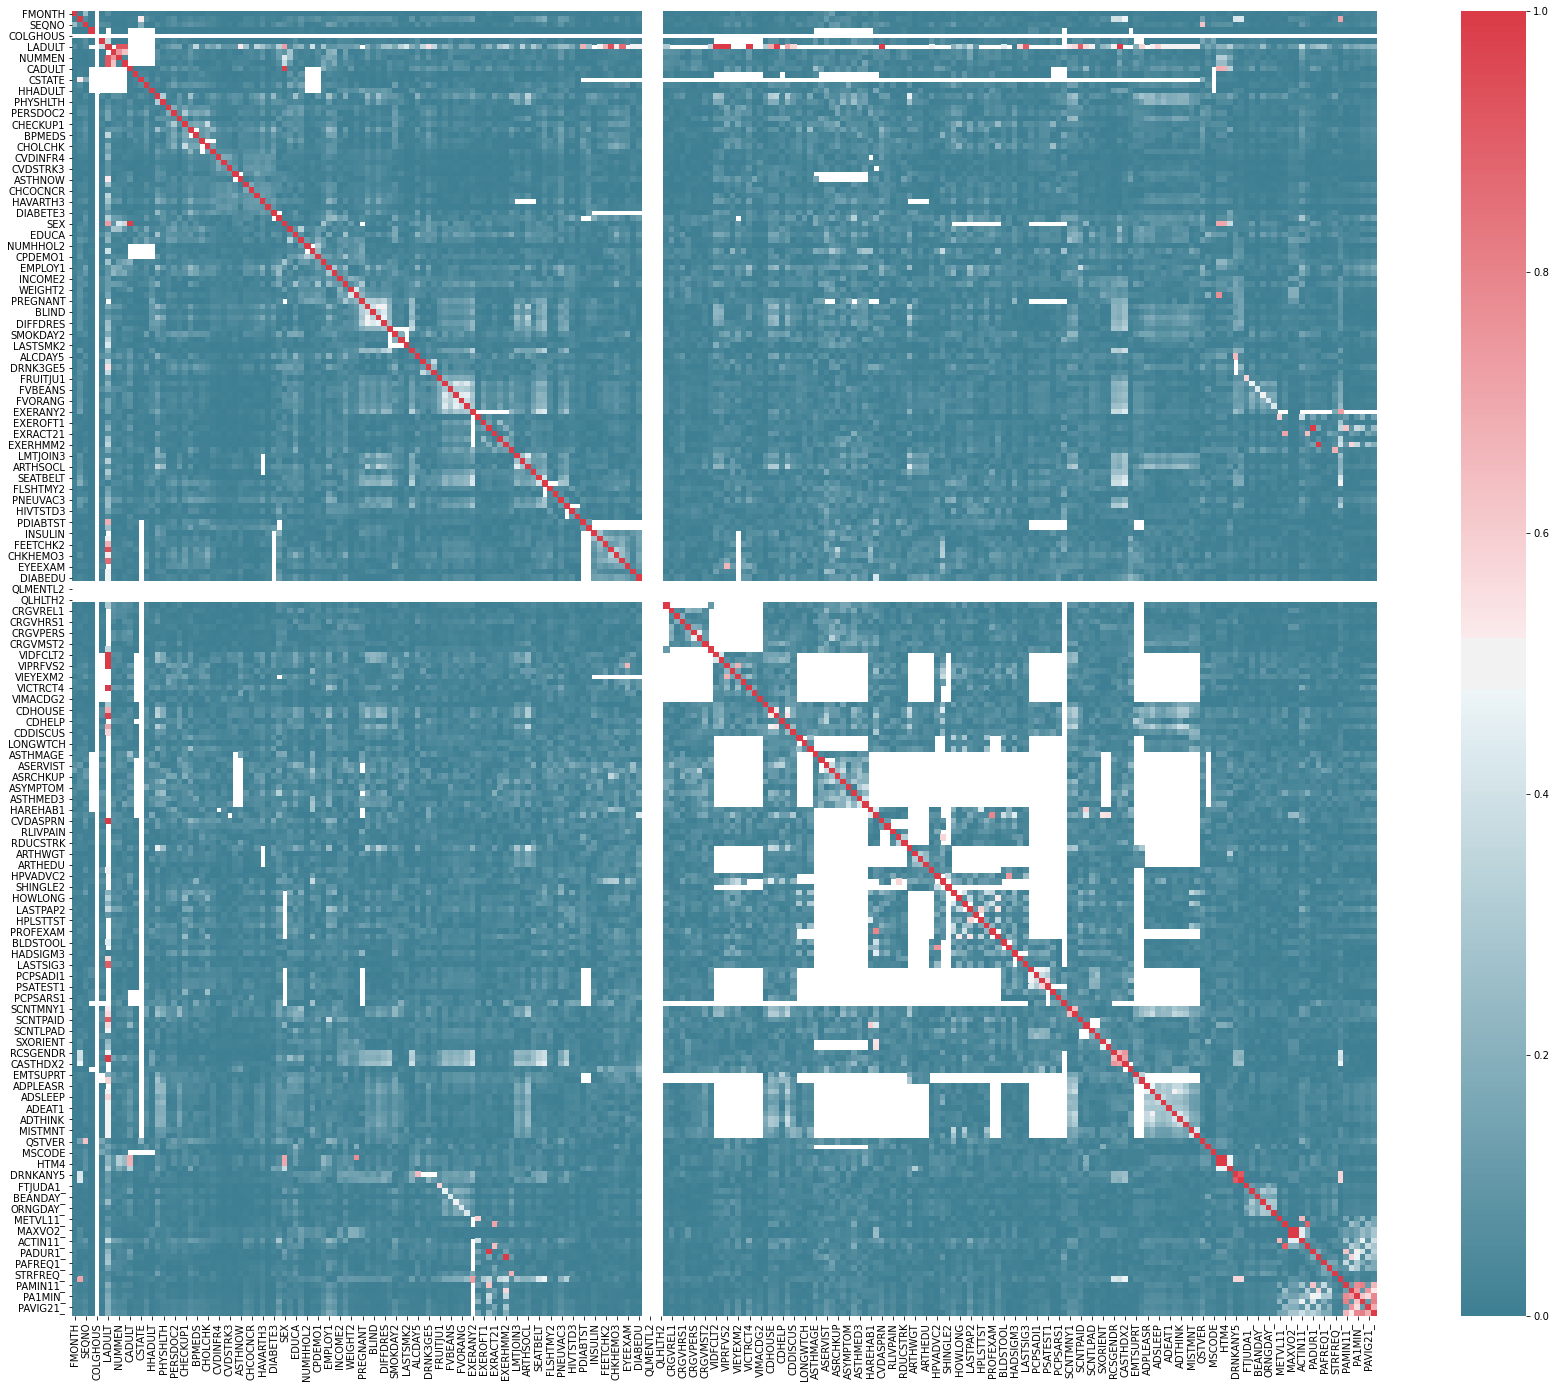

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cov(data):
  # Covariance matrix for female
  cov_matrix = data.corr().abs()
  # Heatmap of above Covariance matrix
  f, ax = plt.subplots(figsize=(30, 24))
  sns.heatmap(cov_matrix, mask=np.zeros_like(cov_matrix, dtype=np.bool),
  cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)#, annot=True
plot_cov(training_set)

In [92]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]

In [93]:
len(to_drop)

12

In [94]:
training_set.drop(to_drop, axis=1,inplace = True)

In [95]:
model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)
model.fit(training_set,training_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<BarContainer object of 224 artists>

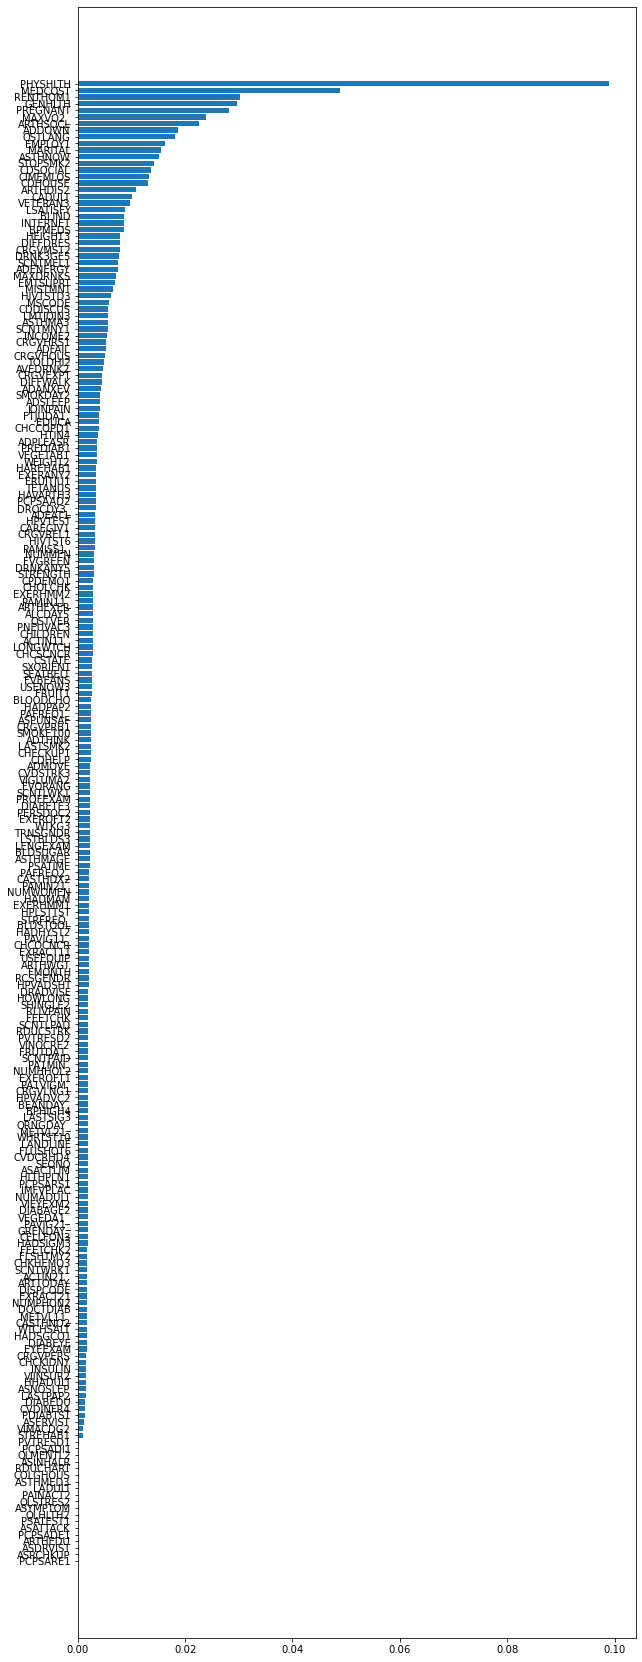

In [96]:
import matplotlib.pyplot as plt
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(10,30))
plt.barh(training_set.columns[sorted_idx], model.feature_importances_[sorted_idx])

In [97]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85     60394
         1.0       0.71      0.43      0.54     26416

    accuracy                           0.77     86810
   macro avg       0.75      0.68      0.69     86810
weighted avg       0.76      0.77      0.75     86810




In [98]:
model.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

### Understanding the variation of the Top-40 shortlisted columns 

In [99]:
selected = training_set.columns[sorted_idx][-40:]

In [66]:
selected

Index(['CHOLCHK', 'PREDIAB1', 'DROCDY3_', 'PCPSAAD2', 'CRGVREL1', 'STOPSMK2',
       'BLIND', 'ASTHNOW', 'ADPLEASR', 'EMTSUPRT', 'MAXDRNKS', 'CDSOCIAL',
       'SCNTMEL1', 'DIFFDRES', 'CRGVHOUS', 'HEIGHT3', 'LSATISFY', 'BPMEDS',
       'ADSLEEP', 'ADENERGY', 'ARTHSOCL', 'AVEDRNK2', 'CIMEMLOS', 'CADULT',
       'CRGVMST2', 'DRNK3GE5', 'INTERNET', 'QSTLANG', 'ADDOWN', 'CDHOUSE',
       'MARITAL', 'EMPLOY1', 'PREGNANT', 'GENHLTH', 'RENTHOM1', 'VETERAN3',
       'MEDCOST', 'MAXVO2_', 'PHYSHLTH', 'ADDEPEV2'],
      dtype='object')

In [1]:
# List of the shorlisted Top 40 columns for each year 
selected_2011 = ['FVGREEN', 'ALCDAY5', 'LASTSMK2', 'FRUITJU1', 'CHECKUP1', 'USEEQUIP',
       'FRUIT1', 'MRACEASC', 'SEATBELT', 'FTJUDA1_', 'VEGETAB1', 'EDUCA',
       'AVEDRNK2', 'VETERAN3', 'CHCCOPD', 'HIVTSTD3', 'MAXDRNKS', 'RACE2',
       'DRNK3GE5', 'TOLDHI2', 'ARTHDIS2', 'CHCVISON', 'INCOME2', 'JOINPAIN',
       'HIVRISK3', 'SMOKDAY2', 'QSTLANG', 'RENTHOM1', 'MAXVO2_', 'MARITAL',
       'LMTJOIN3', 'ASTHNOW', 'EMPLOY', 'STOPSMK2', 'PREGNANT', 'SEX',
       'GENHLTH', 'AGE', 'MEDCOST', 'PHYSHLTH','MENTHLTH']
       
selected_2012 = ['HIVTSTD3', 'QLHLTH2', 'RRCOGNT2', 'PCPSARE1', 'MISTRHLP', 'PCPSARS1',
       'AVEDRNK2', 'QLREST2', 'LADULT', 'DRNK3GE5', 'LASTPAP2', 'INCOME2',
       'ACEDEPRS', 'CALLBACK', 'RENTHOM1', 'QSTLANG', 'MAXDRNKS', 'RACE2',
       'SCNTMONY', 'HAVARTH3', 'LENGEXAM', 'QLSTRES2', 'ASTHNOW', 'DRNKDRI2',
       'MARITAL', 'STOPSMK2', 'EMPLOY', 'QLMENTL2', 'HADMAM', 'PCPSAAD1',
       'HIVRISK3', 'PREGNANT', 'SEX', 'FALL12MN', 'CHCVISN1', 'MISNERVS',
       'AGE', 'GENHLTH', 'MEDCOST', 'PHYSHLTH','MENTHLTH']

selected_2014 = ['INCOME2', 'CSRVINSR', 'QLSTRES2', 'FALLINJ2', 'PCPSARE1', 'MAXDRNKS',
       'DRVISITS', 'HAVARTH3', 'VETERAN3', 'DRNKDRI2', 'EMTSUPRT', 'USEEQUIP',
       'LASTPAP2', 'SCNTMNY1', 'STOPSMK2', 'RENTHOM1', 'SMOKDAY2', 'PCPSAAD2',
       'DRNK3GE5', 'QSTLANG', 'MEDICARE', 'MARITAL', 'CARERCVD', 'ASTHMA3',
       'LENGEXAM', 'SLEPTIM1', 'QLMENTL2', 'GENHLTH', 'DIFFALON', 'PSATEST1',
       'HADMAM', 'SEX', 'INTERNET', 'DELAYMED', 'PREGNANT', 'EMPLOY1',
       'SHINGLE2', 'FALL12MN', 'MEDCOST', 'PHYSHLTH','MENTHLTH']
       
selected_2013 = ['JOINPAIN', 'HADMAM', 'HIVTSTD3', 'HAVARTH3', 'VETERAN3', 'PCTCELL',
       'DIFFDRES', 'CHCCOPD1', 'SMOKDAY2', 'AVEDRNK2', 'VEGETAB1', 'INCOME2',
       'USEEQUIP', 'EMTSUPRT', 'BLIND', 'DRVISITS', 'SCNTMONY', 'TOLDHI2',
       'DRNK3GE5', 'ASTHNOW', 'STOPSMK2', 'LMTJOIN3', 'MAXDRNKS', 'ARTHDIS2',
       'RENTHOM1', 'CARERCVD', 'INTERNET', 'QSTLANG', 'MARITAL', 'EMPLOY1',
       'SLEPTIM1', 'MISNERVS', 'DIFFALON', 'DELAYMED', 'SEX', 'MAXVO2_',
       'GENHLTH', 'PREGNANT', 'MEDCOST', 'PHYSHLTH','MENTHLTH']
       
selected_2015 = ['CVDASPRN', 'HAVARTH3', 'CRGVEXPT', 'CHCCOPD1', 'HIVTSTD3', 'VETERAN3',
       'CRGVPRB1', 'INCOME2', 'AVEDRNK2', 'JOINPAIN', 'SMOKDAY2', 'SCNTMNY1',
       'ADENERGY', 'INTERNET', 'BLIND', 'MAXDRNKS', 'TOLDHI2', 'EMTSUPRT',
       'ARTHDIS2', 'DIFFDRES', 'STOPSMK2', 'DRNK3GE5', 'DIFFWALK', 'ASTHNOW',
       'EMPLOY1', 'LMTJOIN3', 'MARITAL', 'ADSLEEP', 'CIMEMLOS', 'ADDOWN',
       'QSTLANG', 'CDHOUSE', 'ASTHMA3', 'RENTHOM1', 'MAXVO2_', 'SEX',
       'PREGNANT', 'GENHLTH', 'MEDCOST', 'PHYSHLTH','MENTHLTH']

In [584]:
result  = set(selected_2011).intersection(selected_2012)
result = result.intersection(selected_2013)
result = result.intersection(selected_2014)
result = result.intersection(selected_2015)

In [585]:
# Key features that were related to mental health 
result

{'DRNK3GE5',
 'GENHLTH',
 'INCOME2',
 'MARITAL',
 'MAXDRNKS',
 'MEDCOST',
 'MENTHLTH',
 'PHYSHLTH',
 'PREGNANT',
 'QSTLANG',
 'RENTHOM1',
 'SEX',
 'STOPSMK2'}

In [15]:
results_list = [selected_2011,selected_2012,selected_2013,selected_2014,selected_2015]
results_union = set().union(*results_list)
d = {}
for i in results_union:
    d[i] = 0
    if i in selected_2011:
        d[i] += 1 
    if i in selected_2012:
        d[i] += 1
    if i in selected_2013:
        d[i] += 1 
    if i in selected_2014:
        d[i] += 1 
    if i in selected_2015:
        d[i] += 1 
m = {}
for i in d:
    if d[i] > 3 and i != 'MENTHLTH':
        m[i] = d[i]

<BarContainer object of 18 artists>

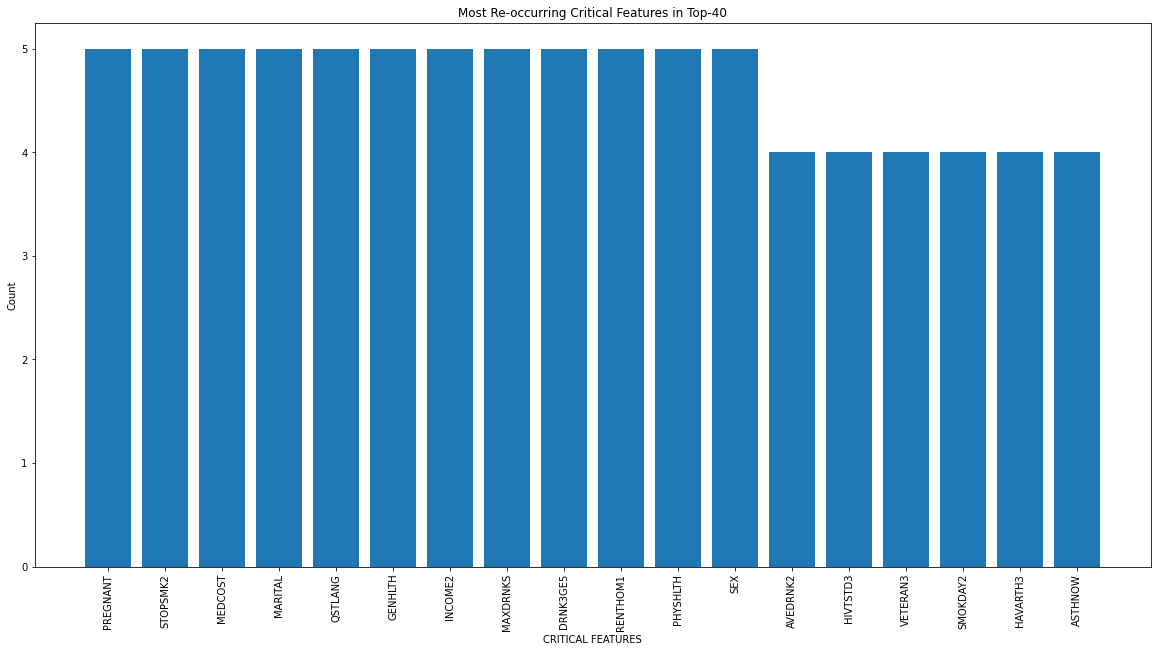

In [21]:
import matplotlib.pyplot as plt
d = {k: v for k, v in sorted(m.items(), key=lambda item: item[1],reverse=True)}
keys = d.keys()
values = d.values()
plt.figure(figsize=(20,10))
plt.title("Most Re-occurring Critical Features in Top-40")
plt.ylabel('Count')
plt.xlabel('CRITICAL FEATURES')

plt.xticks(rotation=90)
plt.bar(keys, values)